Import dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
from sklearn import metrics

Data collection

In [2]:
car_price_data = pd.read_csv('/content/car data.csv')

In [3]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_price_data.shape

(301, 9)

In [5]:
car_price_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
car_price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking the number of missing values
car_price_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [10]:
#  checking the distribution in catagorical data
print(car_price_data.Fuel_Type.value_counts())
print(car_price_data.Seller_Type.value_counts())
print(car_price_data.Transmission.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


Encoding the catagorical data

In [12]:
# encoding the fuel_type column
car_price_data.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# encoding the Seller_Type column
car_price_data.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

# encoding the Transmission column
car_price_data.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [13]:
car_price_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Spliting the data into traing and test data

In [14]:
X = car_price_data.drop(['Selling_Price','Car_Name'],axis=1)
Y = car_price_data['Selling_Price']

In [15]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

Splitting training and test data

In [16]:
x_train,x_test, y_train, y_test = train_test_split(X,Y,test_size=.1,random_state=2,)

In [18]:
print(X.shape,x_train.shape,x_test.shape)

(301, 7) (270, 7) (31, 7)


Model Training :Linear Regression

In [32]:
# loading linear regrssion model

lin_reg_model = LinearRegression()

In [20]:
lin_reg_model.fit(x_train, y_train)

LinearRegression()

Model Evaluation

In [21]:
# prediction on training data

training_data_prediction = lin_reg_model.predict(x_train)

In [24]:
# R square error

error_score = metrics.r2_score(y_train,training_data_prediction)
print("R sqaured Error score is :",error_score)

R sqaured Error score is : 0.8799451660493711


Visaulze the actualprices vs predicted prices

Text(0.5, 1.0, 'Actual prices vs predicted prices')

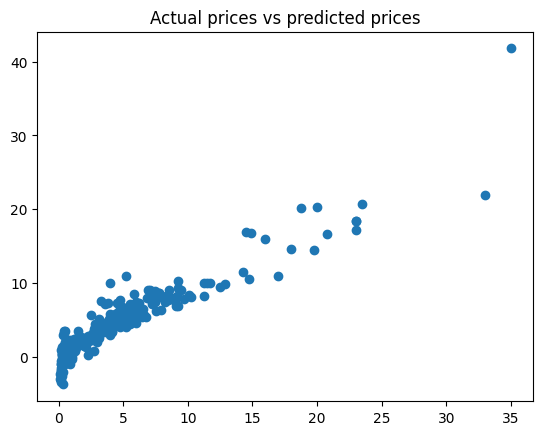

In [26]:
plt.scatter(y_train, training_data_prediction)
plt.x_label = 'Actual price'
plt.y_label = 'predicted price'
plt.title('Actual prices vs predicted prices')

In [28]:
# prediction on test data

test_data_prediction = lin_reg_model.predict(x_test)

# R square error

error_score = metrics.r2_score(y_test,test_data_prediction)
print("R sqaured Error score is :",error_score)

R sqaured Error score is : 0.8365766715027051


Text(0.5, 1.0, 'Actual prices vs predicted prices')

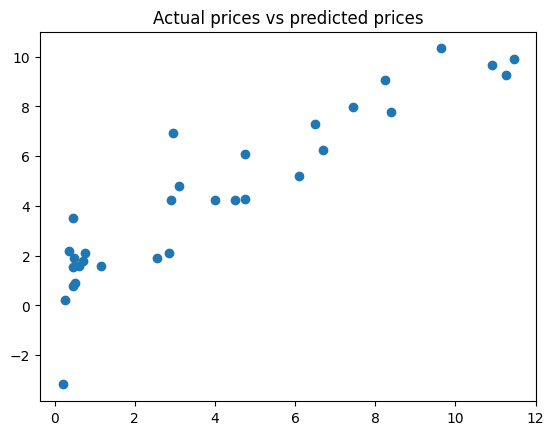

In [29]:
plt.scatter(y_test, test_data_prediction)
plt.x_label = 'Actual price'
plt.y_label = 'predicted price'
plt.title('Actual prices vs predicted prices')

LASSO regression

In [33]:
# loading Lasso regrssion model

Lass_reg_model = Lasso()

In [34]:
Lass_reg_model.fit(x_train, y_train)

Lasso()

Model Evaluation

In [41]:
# prediction on training data

training_data_prediction = Lass_reg_model.predict(x_train)

In [42]:
# R square error

error_score = metrics.r2_score(y_train,training_data_prediction)
print("R sqaured Error score is :",error_score)

R sqaured Error score is : 0.8427856123435794


Visaulze the actualprices vs predicted prices

Text(0.5, 1.0, 'Actual prices vs predicted prices')

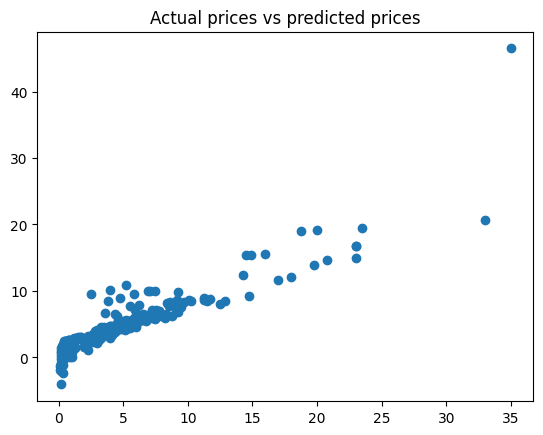

In [43]:
plt.scatter(y_train, training_data_prediction)
plt.x_label = 'Actual price'
plt.y_label = 'predicted price'
plt.title('Actual prices vs predicted prices')

In [45]:
print(x_test)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
99   2010         20.450       50024  ...            0             0      0
161  2014          0.826       23000  ...            1             0      0
89   2014          6.760       40000  ...            0             0      0
30   2012          5.980       51439  ...            0             0      0
232  2015         14.790       12900  ...            0             1      0
290  2014          6.400       19000  ...            0             0      0
35   2011          7.740       49998  ...            0             0      0
7    2015          8.610       33429  ...            0             0      0
183  2013          0.470       21000  ...            1             0      0
13   2015          7.710       26000  ...            0             0      0
269  2015         10.000       18828  ...            0             0      0
65   2014          6.950       45000  ...            0             0      0
178  2014   

In [47]:
# prediction on test data

test_data_prediction = Lass_reg_model.predict(x_test)

# R square error

error_score = metrics.r2_score(y_test,test_data_prediction)
print("R sqaured Error score is :",error_score)

R sqaured Error score is : 0.8709167941173195


Text(0.5, 1.0, 'Actual prices vs predicted prices')

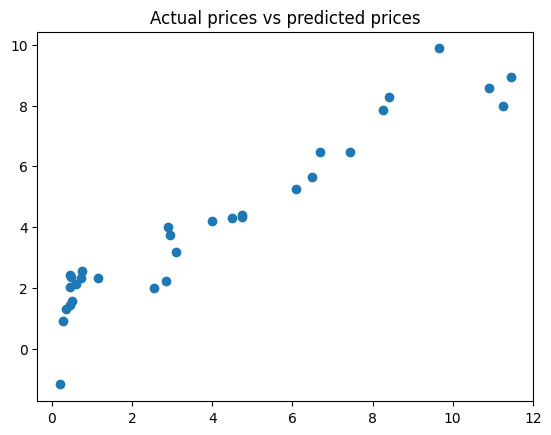

In [48]:
plt.scatter(y_test, test_data_prediction)
plt.x_label = 'Actual price'
plt.y_label = 'predicted price'
plt.title('Actual prices vs predicted prices')